In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
data = pd.read_csv('final_data.csv')

In [3]:
# Get time_window upper bound value
data['time_window_upper'] = data['time_window'].str.extract(r'\, (\d+\.?\d*)\]').astype(float)

for col in data.select_dtypes(include='object').columns:
    if col != 'time_window': 
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])


In [4]:
# feateure selection
feature_columns = [col for col in data.columns if col not in ['subject_id', 'mortality_24h', 'time_window','time_window_upper']]
X = data[feature_columns]
y = data['mortality_24h']

# standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Data split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [5]:
# Xgboost
model = xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.05, max_depth=6,
                          n_estimators=150, subsample=0.8, colsample_bytree=0.8,
                          eval_metric='logloss', use_label_encoder=False)

model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)], verbose=True)

# Predict testset
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  

# Performance
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"Accuracy: {accuracy:.4f}, AUC: {auc_score:.4f}")


[0]	validation_0-logloss:0.14577
[1]	validation_0-logloss:0.13987
[2]	validation_0-logloss:0.13430
[3]	validation_0-logloss:0.12909
[4]	validation_0-logloss:0.12415
[5]	validation_0-logloss:0.11944
[6]	validation_0-logloss:0.11510
[7]	validation_0-logloss:0.11088
[8]	validation_0-logloss:0.10689
[9]	validation_0-logloss:0.10310
[10]	validation_0-logloss:0.09962
[11]	validation_0-logloss:0.09634
[12]	validation_0-logloss:0.09329
[13]	validation_0-logloss:0.09032
[14]	validation_0-logloss:0.08748
[15]	validation_0-logloss:0.08485
[16]	validation_0-logloss:0.08236
[17]	validation_0-logloss:0.08007
[18]	validation_0-logloss:0.07789
[19]	validation_0-logloss:0.07573
[20]	validation_0-logloss:0.07371
[21]	validation_0-logloss:0.07180
[22]	validation_0-logloss:0.07005
[23]	validation_0-logloss:0.06829
[24]	validation_0-logloss:0.06666
[25]	validation_0-logloss:0.06507
[26]	validation_0-logloss:0.06353
[27]	validation_0-logloss:0.06222
[28]	validation_0-logloss:0.06096
[29]	validation_0-loglos

C:\Users\ALIENWARE\miniconda3\envs\pytorch\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[39]	validation_0-logloss:0.05069
[40]	validation_0-logloss:0.05003
[41]	validation_0-logloss:0.04937
[42]	validation_0-logloss:0.04880
[43]	validation_0-logloss:0.04830
[44]	validation_0-logloss:0.04778
[45]	validation_0-logloss:0.04727
[46]	validation_0-logloss:0.04680
[47]	validation_0-logloss:0.04638
[48]	validation_0-logloss:0.04597
[49]	validation_0-logloss:0.04558
[50]	validation_0-logloss:0.04515
[51]	validation_0-logloss:0.04476
[52]	validation_0-logloss:0.04444
[53]	validation_0-logloss:0.04413
[54]	validation_0-logloss:0.04379
[55]	validation_0-logloss:0.04349
[56]	validation_0-logloss:0.04319
[57]	validation_0-logloss:0.04285
[58]	validation_0-logloss:0.04266
[59]	validation_0-logloss:0.04243
[60]	validation_0-logloss:0.04224
[61]	validation_0-logloss:0.04206
[62]	validation_0-logloss:0.04186
[63]	validation_0-logloss:0.04164
[64]	validation_0-logloss:0.04142
[65]	validation_0-logloss:0.04122
[66]	validation_0-logloss:0.04107
[67]	validation_0-logloss:0.04090
[68]	validatio

Confusion Matrix:
 [[7728    4]
 [  75    4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      7732
           1       0.50      0.05      0.09        79

    accuracy                           0.99      7811
   macro avg       0.75      0.53      0.54      7811
weighted avg       0.99      0.99      0.99      7811


Feature Importances:
                     Features  Importance
2             heart_rate_min    0.170355
18     oxygen_saturation_min    0.084982
6            systolic_bp_min    0.065494
14      respiratory_rate_min    0.041956
16    oxygen_saturation_mean    0.041027
7         systolic_bp_median    0.040472
15   respiratory_rate_median    0.037146
4           systolic_bp_mean    0.037068
20                 age_years    0.036642
5            systolic_bp_max    0.036371
10          diastolic_bp_min    0.036335
8          diastolic_bp_mean    0.036073
19  oxygen_saturation_median    0.035752
3    

C:\Users\ALIENWARE\AppData\Local\Temp\ipykernel_23672\3679696038.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_frame, x='Importance', y='Features', palette='viridis')


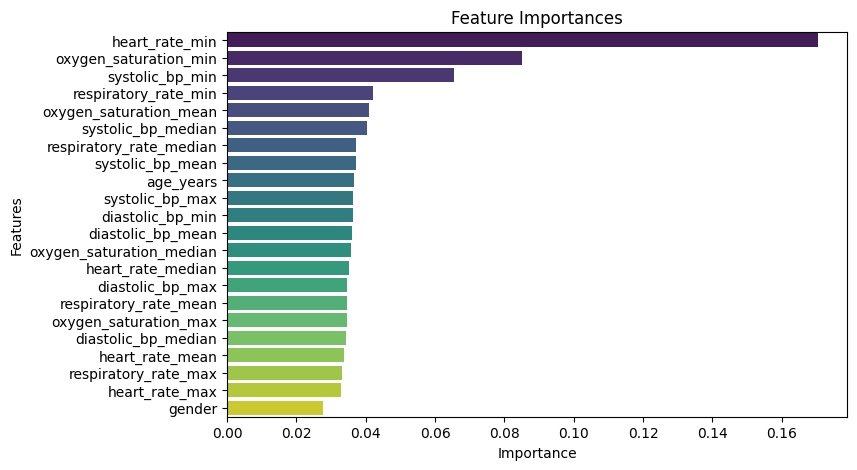

In [8]:
# Confusion matrix and metric report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# feature importance
feature_importances = model.feature_importances_
importance_frame = pd.DataFrame({
    'Features': feature_columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:\n", importance_frame)



# plots
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_frame, x='Importance', y='Features', palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()